# Naive Bayes
Hoy vamos a usar un clasificador Naives Bayes, la idea es pder construir u modelo que nos diga si un tumor es o no maligno, en base a un grupo de observaciones al tumor.
Este datase forma parte de los que vienen incluidos como ejemplo con sklearn

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# importar datasets de sklearn
from sklearn import datasets


In [23]:
# se carga el dataset
dataset = datasets.load_breast_cancer()
dataset

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [24]:
# voy a hacer un dataframe con los datos
df = pd.DataFrame(
    np.c_[dataset['data'], dataset['target']],
    columns=np.append(dataset['feature_names'], ['target'])
)

In [25]:
clases = df.groupby('target').size()
clases

target
0.0    212
1.0    357
dtype: int64

Text(0.5, 1.0, 'Malignos vs Benignos')

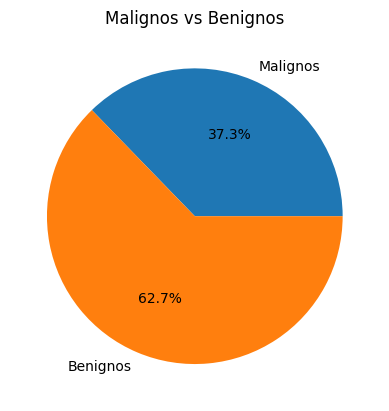

In [26]:
# Grafico de torta
etiquetas = ['Malignos', 'Benignos']
plt.pie(clases, labels=etiquetas, autopct='%1.1f%%')
plt.title('Malignos vs Benignos')

En el metodo baye, se asume que hay independencia entre las variables, lo que se sabe que es falso.
En un clasificador naive bayes gaussiano, ademas se asume que todas las variables tienen una distribucion normal, lo que tampoco es verdadero.
A pesar de estos supuestos falsos, la realidad con frecuencia se aproxma lo suficiente para que el resultado sea util

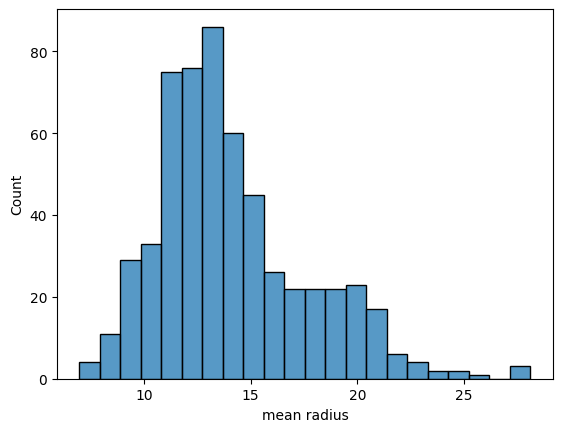

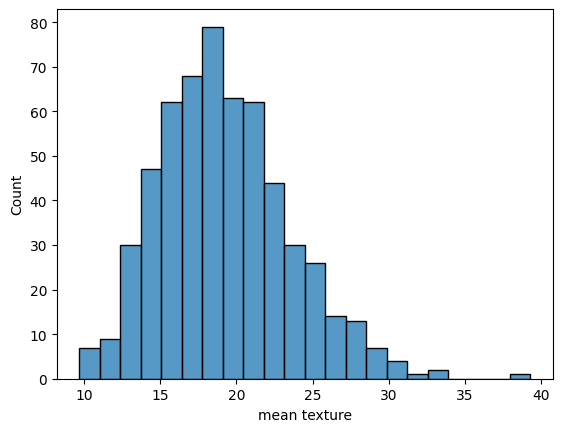

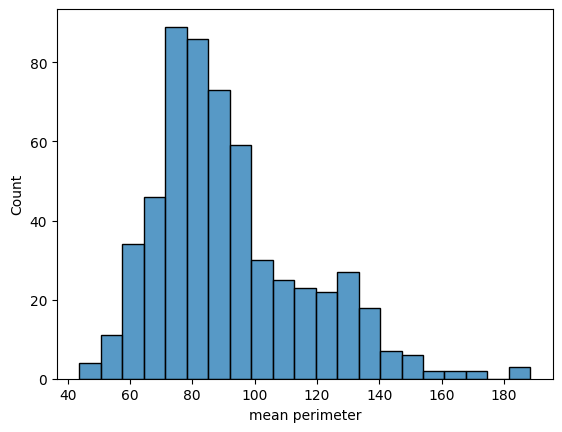

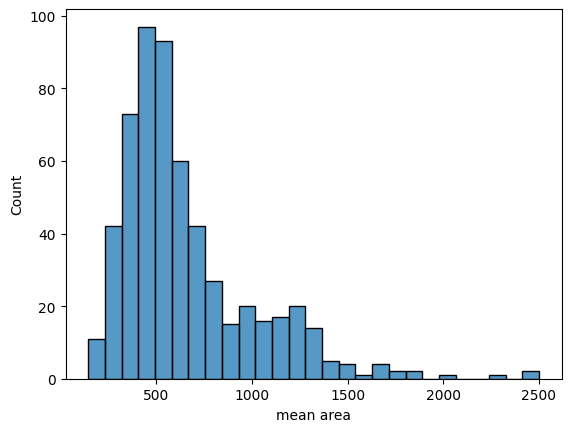

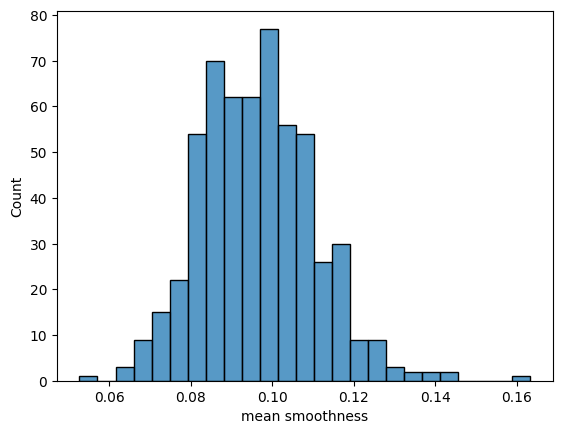

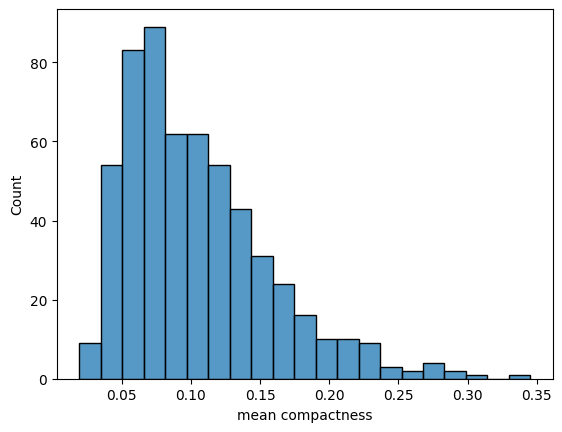

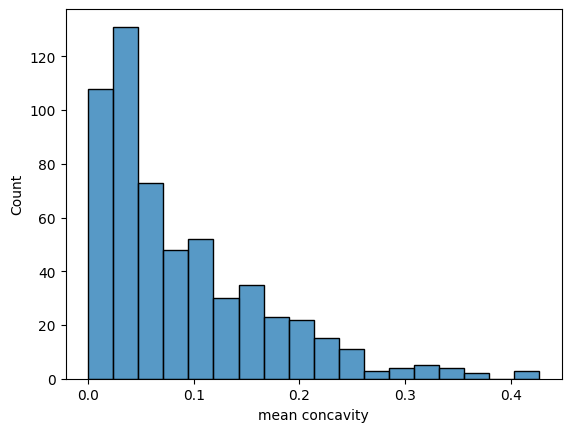

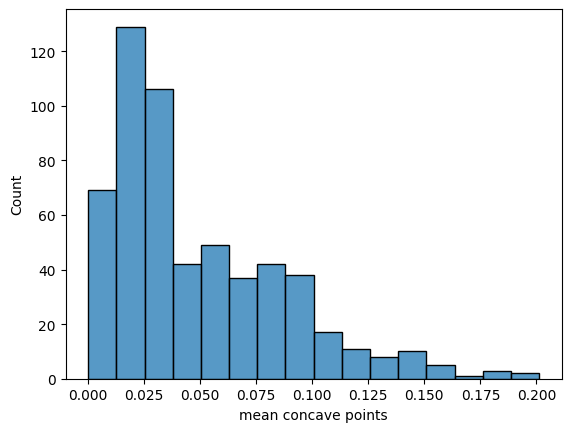

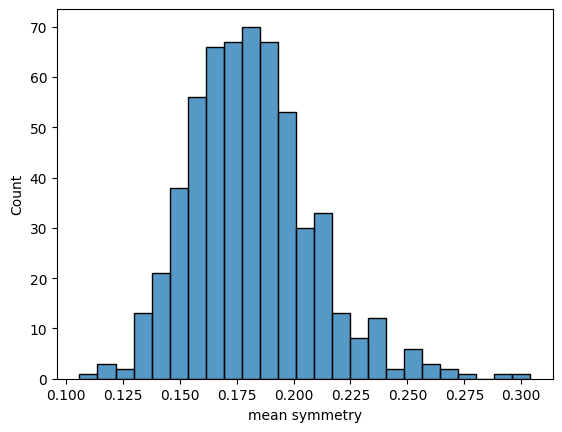

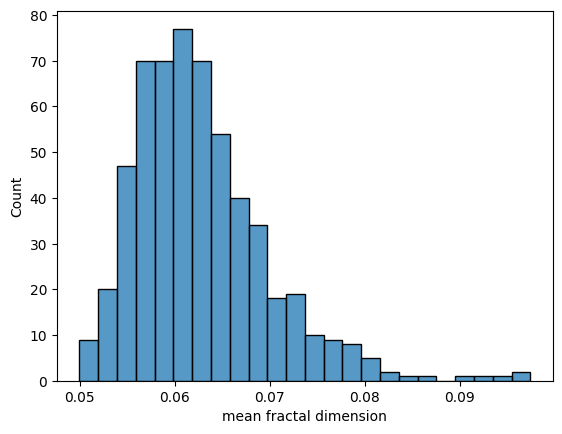

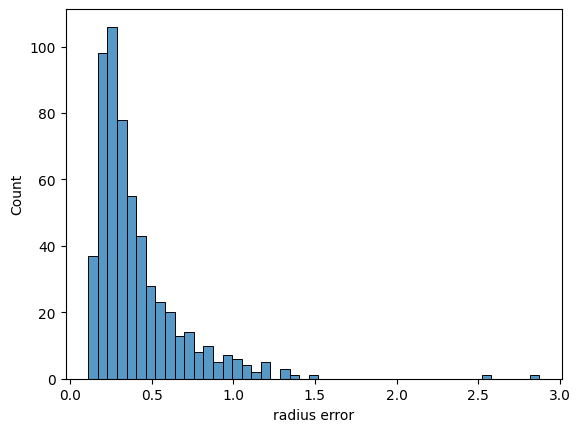

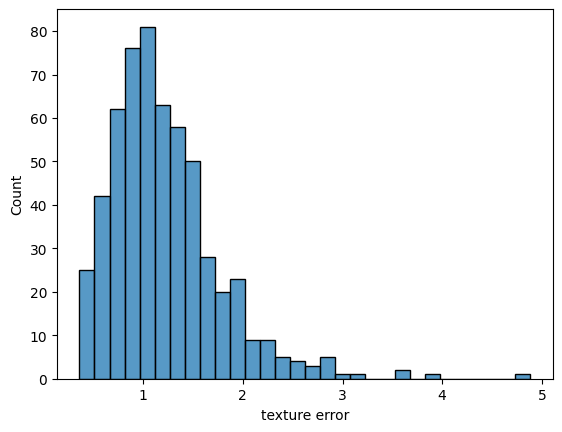

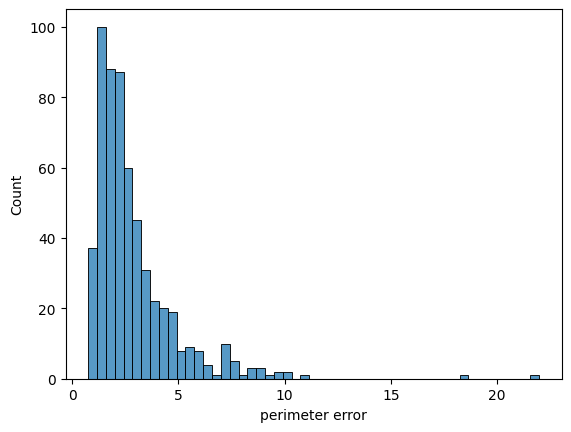

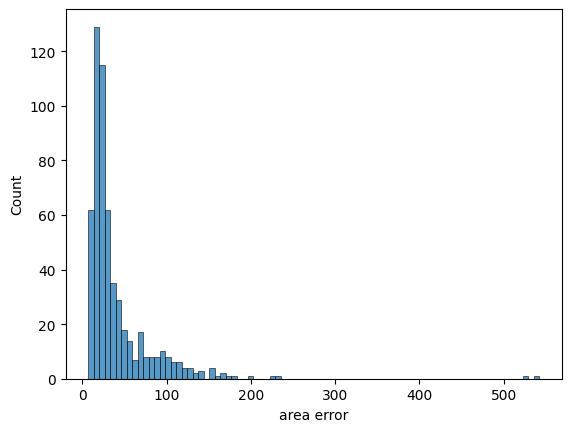

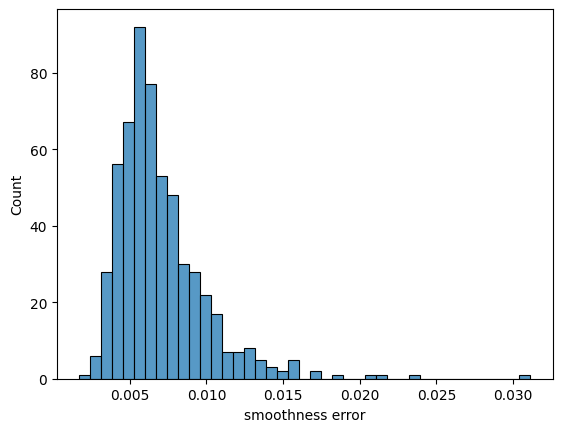

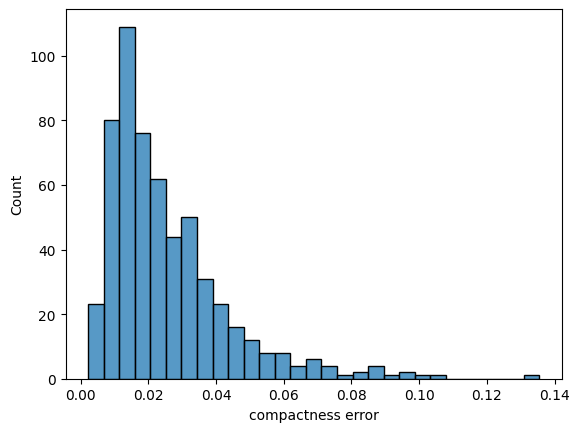

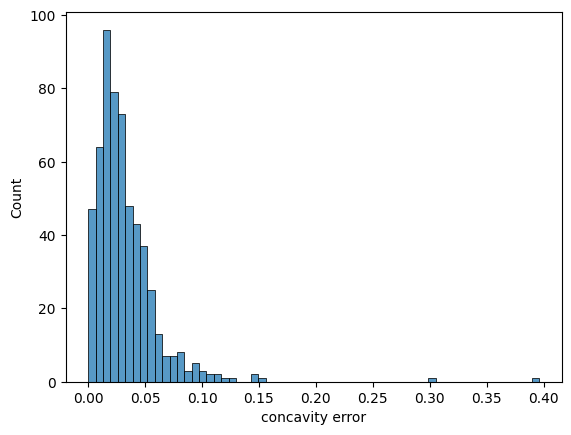

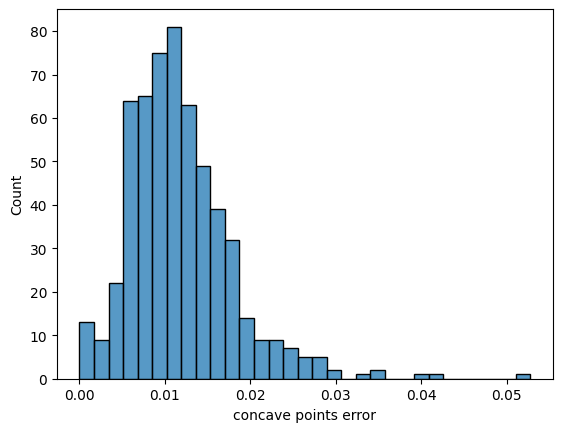

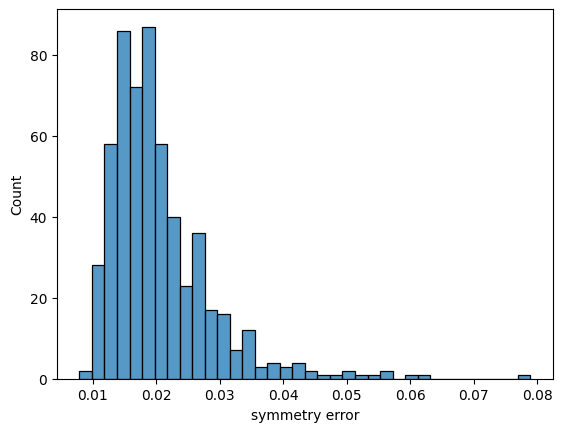

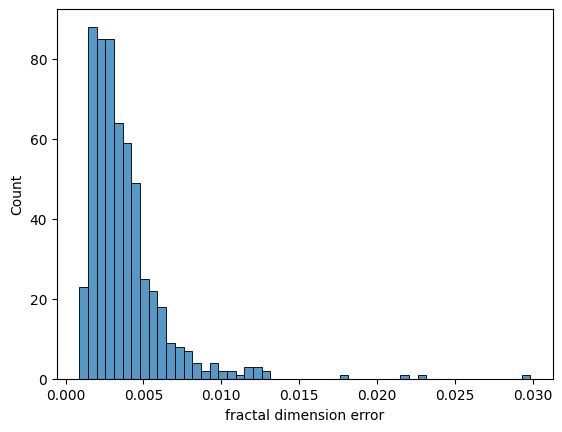

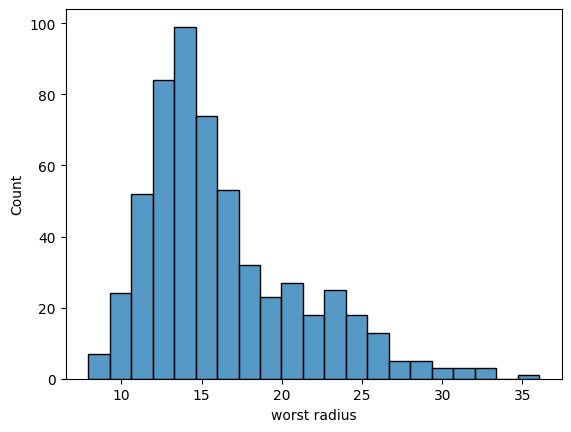

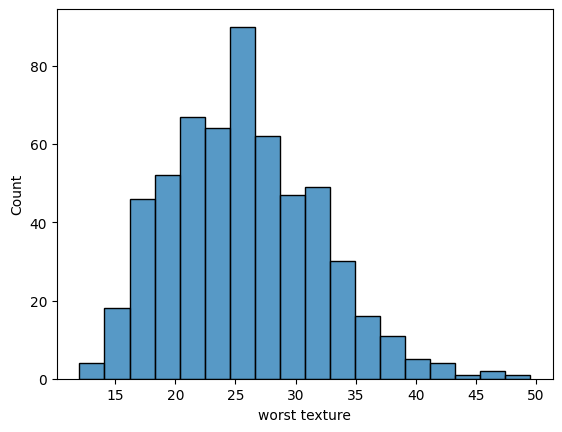

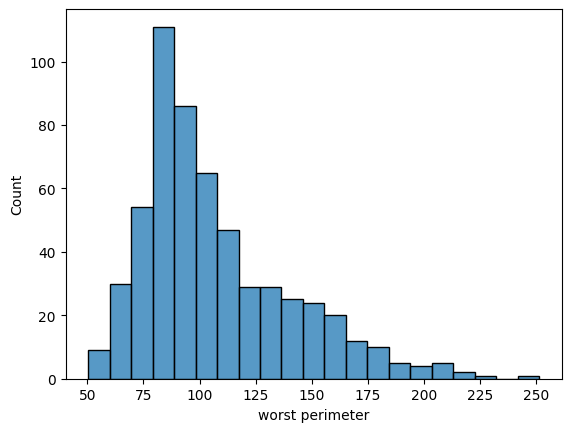

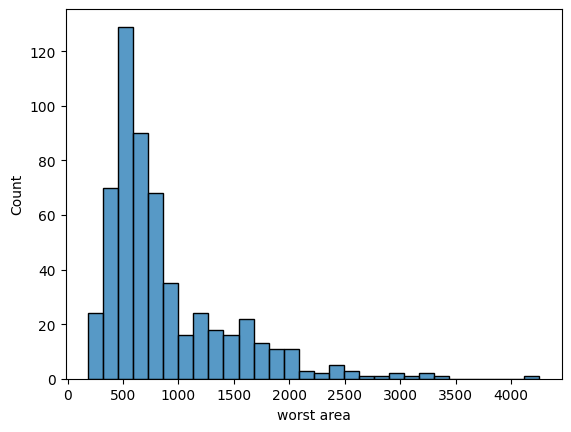

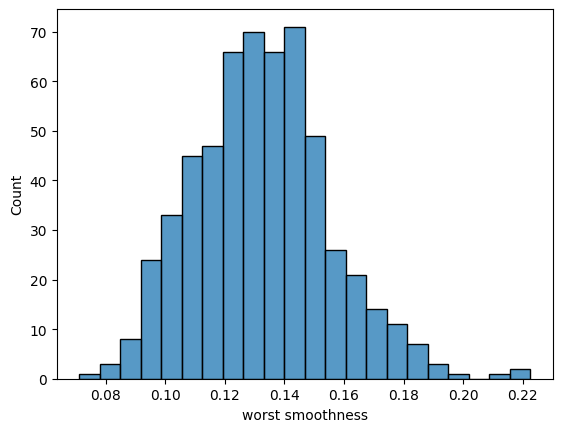

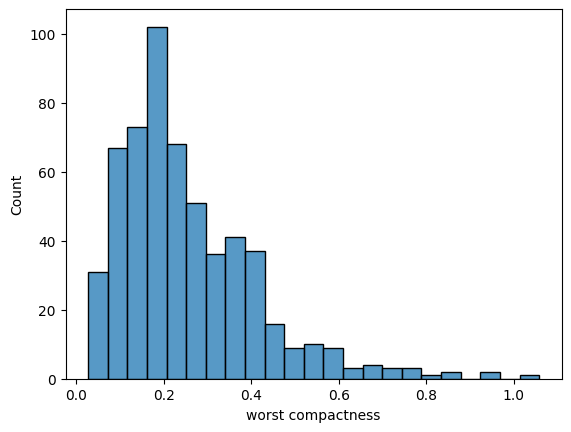

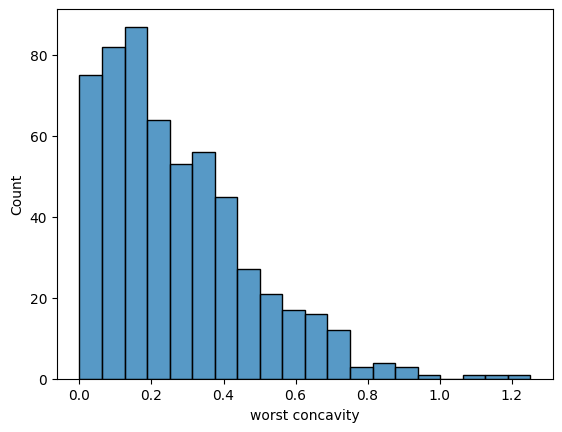

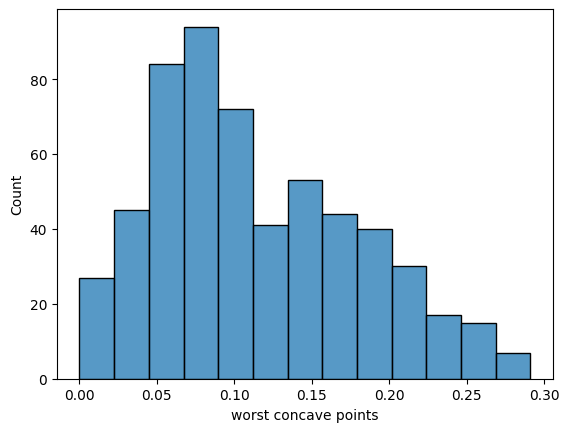

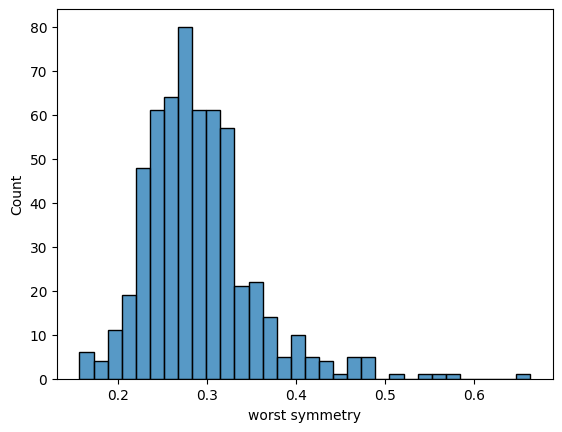

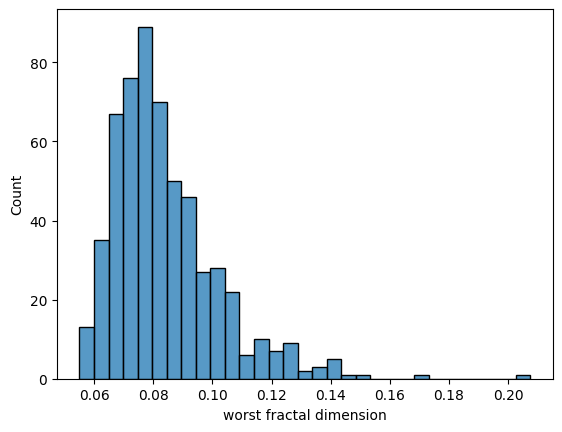

In [27]:
columnas = np.array(df.drop(columns=['target']).columns)
for col in columnas:
    sns.histplot(df[col])
    plt.show()

In [28]:
# Preparamos las variables para el modelo
y = df['target']
x = df.drop(columns=['target'])


In [29]:
# Vamos a guardar un 20% de los datos para verificar el modelo
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [30]:
# Se aplica el modelo
# Esta parte es similar a otros modelos, solo se cambia el algoritmo
from sklearn.naive_bayes import GaussianNB
modelo = GaussianNB()
modelo.fit(X_train, y_train)

GaussianNB()

In [31]:
# Ahora verificamos haciendo una prediccion comparando con el valor real que se guardo en y_test 

from sklearn.metrics import confusion_matrix, precision_score
y_prediccion = modelo.predict(X_test)
confusion = confusion_matrix(y_test, y_prediccion)
print(confusion)
score = precision_score(y_test, y_prediccion)
print(score)

[[40  3]
 [ 0 71]]
0.9594594594594594


In [32]:
# Veamos si omitiendo columnas tenemos resultados razonables
from sklearn.feature_selection import SelectKBest
seleccionador = SelectKBest(k=5)
X_nuevo = seleccionador.fit_transform(x,y)
cols_seleccionadas = seleccionador.get_support()
print(cols_seleccionadas)

[False False  True False False False False  True False False False False
 False False False False False False False False  True False  True False
 False False False  True False False]


In [33]:
# repito el analissi pero camvio X por X_nuevo

X_train, X_test, y_train, y_test = train_test_split(X_nuevo, y, test_size=0.2, random_state=42)
modelo = GaussianNB()
modelo = modelo.fit(X_train, y_train)
y_prediccion = modelo.predict(X_test)
confusion = confusion_matrix(y_test, y_prediccion)
print(confusion)
score = precision_score(y_test, y_prediccion)
print(score)



[[40  3]
 [ 3 68]]
